In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import ccobra
from itertools import combinations, product
import pandas as pd
import numpy as np
import dfs
import re
from functools import reduce
from matplotlib_venn import venn3, venn3_circles
from visualization import *
from preprocessing import *

# Offline inferences in syllogism data from Ragni 2016

In this file I will walk you through how we derive the DFS inferences for syllogistic reasoning. I sampled a DFS space with 10000 models according to some constraints (see prolog files). In a nutshell, there are 6 entities who are either trumpeters, pianists or singers. The goal is to understand what kind of knowledge we can obtain the DFS space with regards to quantified sentences over this universe of 6 entities and 3 properties. Let's first take a look at the meaning space I sampled.


(['All', 'trumpeters', 'trumpeters'], array([1, 1, 1, ..., 1, 1, 1]))
(['All', 'trumpeters', 'pianists'], array([0, 1, 0, ..., 0, 0, 0]))
((['All', 'trumpeters', 'pianists'], array([0, 1, 0, ..., 0, 0, 0])), (['All', 'trumpeters', 'singers'], array([0, 0, 0, ..., 0, 0, 0])))
Models: 20000, Propositions: 18


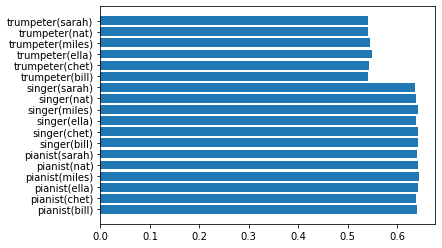

In [2]:
sen_sem_dict = generate_data('gen/10k.mesh', write=False)

jazzSpace = dfs.MeaningSpace(file='gen/10k.obs')
probabilities = [dfs.prior_prob(jazzSpace.matrix[:,idx])for idx, proposition in enumerate(jazzSpace.idx2prop)]
labels = jazzSpace.idx2prop
plt.barh(labels, probabilities)
print(f"Models: {jazzSpace.shape[0]}, Propositions: {jazzSpace.shape[1]}")

Now let's look at some quantified expressions

In [4]:
pianist_predicates = jazzSpace.idx2prop[0:6]
singer_predicates = jazzSpace.idx2prop[6:12]
trumpet_predicates = jazzSpace.idx2prop[12:18]
everyone_trumpets = reduce(dfs.conjunction, [jazzSpace.getVector(p) for p in trumpet_predicates])
everyone_sings = reduce(dfs.conjunction, [jazzSpace.getVector(p) for p in singer_predicates])
everyone_pianist = reduce(dfs.conjunction, [jazzSpace.getVector(p) for p in pianist_predicates])

dfs.prior_prob(reduce(dfs.disjunction, [everyone_pianist, everyone_sings, everyone_trumpets]))

0.1531

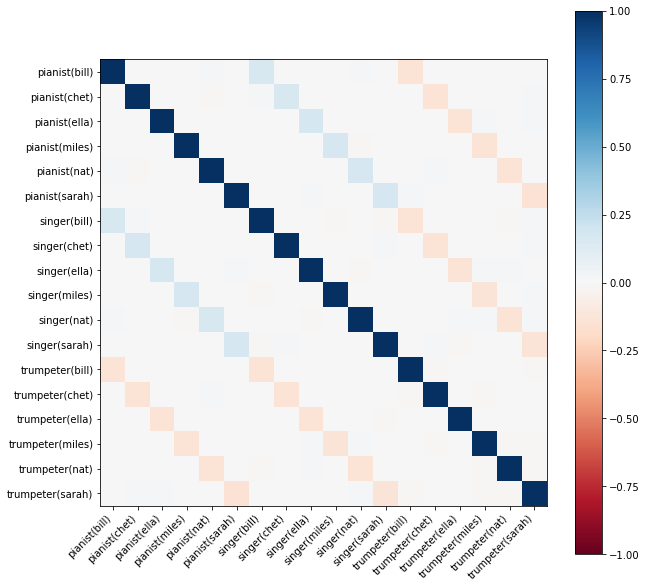

In [5]:
def inference_matrix_plot(vectors, labels):
    m = np.zeros((len(vectors), len(vectors)))
    for i in range(len(m)):
        for j in range(len(m)):
            m[i][j] = dfs.inference_score(vectors[i], vectors[j])

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    mat = ax.matshow(m, cmap=plt.get_cmap('RdBu'), vmin=-1, vmax=1)
    fig.colorbar(mat)

    ax.set_xticks(np.arange(len(m)))
    ax.set_yticks(np.arange(len(m)))
    ax.set_xticklabels(labels, rotation=45, fontsize=10, ha='right')
    ax.set_yticklabels(labels, rotation=0, fontsize=10)
    ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
    #fig.subplots_adjust(bottom=0.2)
    fig.align_xlabels()
    plt.savefig('inference_matrix_plot.pdf')
    plt.show()
    
vectors = [jazzSpace.getVector(p) for p in jazzSpace.prop2idx]
labels = jazzSpace.prop2idx
inference_matrix_plot(vectors, labels)

In [7]:
dfs.prior_prob(dfs.conjunction(jazzSpace.getVector('pianist(bill)'), jazzSpace.getVector('trumpeter(bill)')))

0.2994

Now I load the data from a CSV, generated in `preprocessing.py`

In [2]:
#data = pd.read_csv('dfs_data/premise_pairs.csv', index_col=0)
data = pd.read_json('premise_info.json')

In [3]:
data

,index,type,premise1,premise2,sem1,sem2
0,0,AA4,"[All, trumpeters, pianists]","[All, trumpeters, singers]","[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, ..."
1,1,AA1,"[All, trumpeters, pianists]","[All, pianists, singers]","[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, ..."
2,2,AA2,"[All, trumpeters, pianists]","[All, singers, trumpeters]","[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,AA3,"[All, trumpeters, pianists]","[All, singers, pianists]","[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,AI4,"[All, trumpeters, pianists]","[Some, trumpeters, singers]","[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...,...,...
379,379,OE4,"[Some not, singers, pianists]","[No, singers, trumpeters]","[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
380,380,OO3,"[Some not, singers, pianists]","[Some not, trumpeters, pianists]","[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ..."
381,381,OO2,"[Some not, singers, pianists]","[Some not, trumpeters, singers]","[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, ..."
382,382,OO1,"[Some not, singers, pianists]","[Some not, pianists, trumpeters]","[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [16]:
for response in ccobra.syllogistic.RESPONSES:
    data[response] = data.apply(lambda x: find_inference_j(x, response, obs_size, sen_sem_dict), axis=1)

In [12]:
data

,index,type,premise1,premise2,sem1,sem2,Aac,Aca,Iac,Ica,Eac,Eca,Oac,Oca,NVC
0,0,AA4,"[All, trumpeters, pianists]","[All, trumpeters, singers]","[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, ...",0.072905,0.085991,1.000000,1.000000,-1.000000,-1.000000,-0.072905,-0.085991,-1
1,1,AA1,"[All, trumpeters, pianists]","[All, pianists, singers]","[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, ...",1.000000,-0.980574,1.000000,1.000000,-1.000000,-1.000000,-1.000000,0.980574,-1
2,2,AA2,"[All, trumpeters, pianists]","[All, singers, trumpeters]","[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-0.965297,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.965297,-1.000000,-1
3,3,AA3,"[All, trumpeters, pianists]","[All, singers, pianists]","[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.340765,-0.088008,0.413367,0.413367,-0.413367,-0.413367,-0.340765,0.088008,1
4,4,AI4,"[All, trumpeters, pianists]","[Some, trumpeters, singers]","[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",-0.328089,0.149007,1.000000,1.000000,-1.000000,-1.000000,0.328089,-0.149007,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,379,OE4,"[Some not, singers, pianists]","[No, singers, trumpeters]","[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-0.705256,-0.213307,-0.415438,-0.415438,0.415438,0.415438,0.705256,0.213307,1
380,380,OO3,"[Some not, singers, pianists]","[Some not, trumpeters, pianists]","[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",-0.115787,-0.207227,0.070069,0.070069,-0.070069,-0.070069,0.115787,0.207227,1
381,381,OO2,"[Some not, singers, pianists]","[Some not, trumpeters, singers]","[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, ...",0.038050,-0.505995,-0.031325,-0.031325,0.031325,0.031325,-0.038050,0.505995,1
382,382,OO1,"[Some not, singers, pianists]","[Some not, pianists, trumpeters]","[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",-0.456175,0.052061,0.011914,0.011914,-0.011914,-0.011914,0.456175,-0.052061,1


In [13]:
by_type = data.groupby('type',as_index = False).mean()
types = by_type['type'].tolist()
by_type_onlydata = by_type.copy(deep=True)
by_type_onlydata.pop('index')
by_type_onlydata.pop('type')

0     AA1
1     AA2
2     AA3
3     AA4
4     AE1
     ... 
59    OI4
60    OO1
61    OO2
62    OO3
63    OO4
Name: type, Length: 64, dtype: object

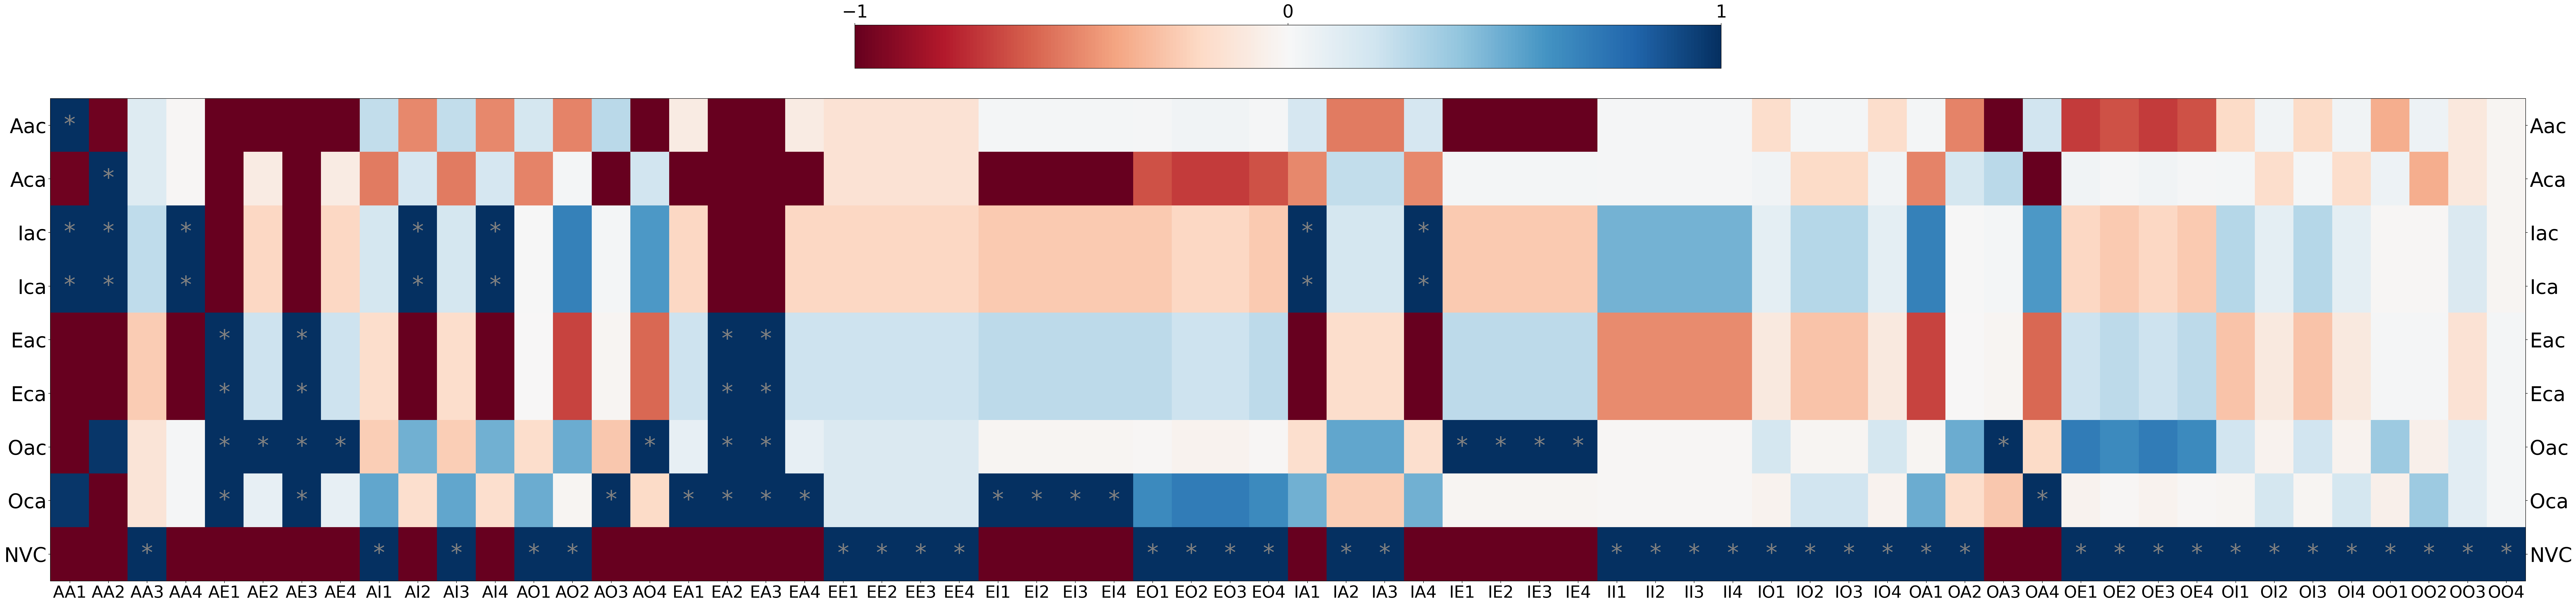

In [15]:
inference_matrix(by_type_onlydata, types, correct_responses)

In [14]:
by_type

,type,index,Aac,Aca,Iac,Ica,Eac,Eca,Oac,Oca,NVC
0,AA1,41.5,1.000000,-0.971967,1.000000,1.000000,-1.000000,-1.000000,-1.000000,0.971967,-1.0
1,AA2,41.5,-0.971967,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.971967,-1.000000,-1.0
2,AA3,41.5,0.127337,0.127337,0.256952,0.256952,-0.256952,-0.256952,-0.127337,-0.127337,1.0
3,AA4,41.5,-0.009541,-0.009541,1.000000,1.000000,-1.000000,-1.000000,0.009541,0.009541,-1.0
4,AE1,49.5,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
59,OI4,333.5,0.034060,-0.178854,0.096826,0.096826,-0.096826,-0.096826,-0.034060,0.178854,1.0
60,OO1,341.5,-0.366684,0.048711,-0.007971,-0.007971,0.007971,0.007971,0.366684,-0.048711,1.0
61,OO2,341.5,0.048711,-0.366684,-0.007971,-0.007971,0.007971,0.007971,-0.048711,0.366684,1.0
62,OO3,341.5,-0.105911,-0.105911,0.143128,0.143128,-0.143128,-0.143128,0.105911,0.105911,1.0


In [115]:
def venn_diagrams2(data, rows, columns):
    fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(28,7.3))
    i = 0
    for (m,n), subplot in np.ndenumerate(axes):
        datapoint = data.iloc[i]
        #print(subplot)
        subplot.set_xlim(-5, 5)
        subplot.set_ylim(-5, 5)
        subplot.set_aspect('equal')
        subplot.axes.xaxis.set_visible(False)
        subplot.axes.yaxis.set_visible(False)
        if i == 6:
            print(i)
        addVennDiagram(subplot, norm(np.array([0, datapoint['Oca'], datapoint['Oac'], max(datapoint['Iac'], datapoint['Ica'])])))
        subplot.annotate('A', (-3,1.8))
        #subplot.annotate('B', (-2.7,-3.1))
        subplot.annotate('C', (2.8,-1.5))
        title = datapoint['type']
        if datapoint['NVC'] == 1.0:
            subplot.title.set_text(f"{title}*")
        else:
            subplot.title.set_text(f'{title}')                      
        i += 1 #wtf am i doing man

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.81, 0.122, 0.01, 0.755])
    im = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('RdBu'),norm=mpl.colors.Normalize(clip=True, vmin=-1.0,vmax=1.0))
    fig.colorbar(im, cbar_ax, ticks=[-1,0,1], aspect=20)
    plt.savefig('testvenns.png')
    plt.show()

6


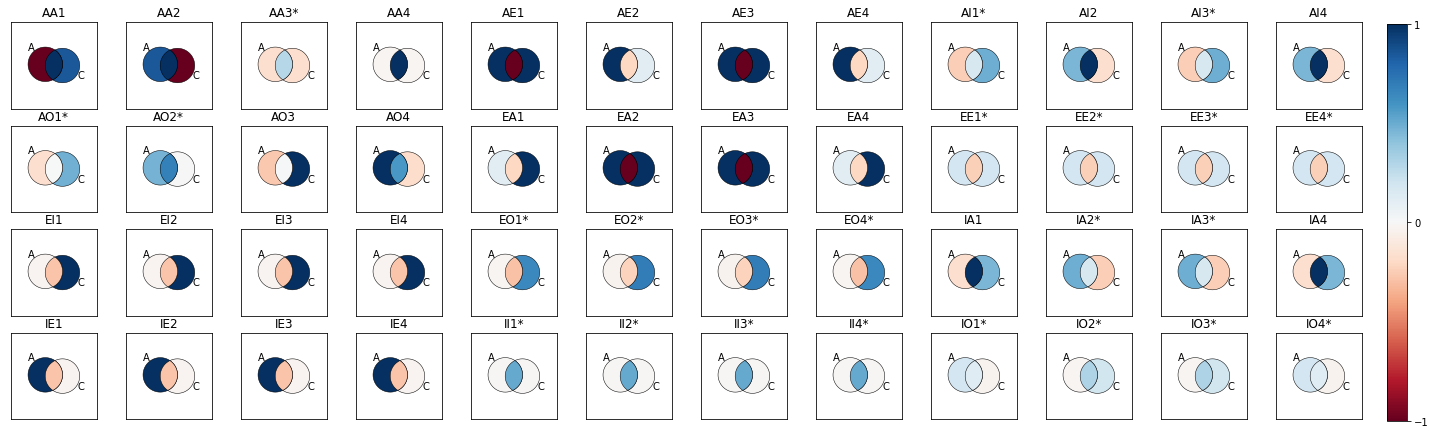

In [117]:
num_events = 3
venn_diagrams2(by_type, 4, 12)

In [52]:
def inference_matrix2(data, types, correct_responses):
    fig = plt.figure(figsize=(1,1))
    ax = fig.add_subplot(111)
    mat = ax.matshow(data.iloc[:16].T, cmap=plt.get_cmap('RdBu'), aspect='auto')
    cb = fig.colorbar(mat, location='top', shrink=0.35, ticks=[-1, 0, 1])
    cb.ax.tick_params(labelsize=18)

    ax.set_xticks(np.arange(16))
    ax.set_yticks(np.arange(data.shape[1]))
    ax.set_xticklabels(types[:16], rotation=0, fontsize=16)
    ax.set_yticklabels(data.columns.tolist(), rotation=0, fontsize=24)
    ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
    ax.tick_params(axis="y", left=True, right=False, labelleft=True, labelright=False)

    fig.align_xlabels()

    x_labels = list(ax.get_xticklabels())
    y_labels = list(ax.get_yticklabels())
    min_val, max_val, diff = 0., 16, 1.
    ind_array = np.arange(min_val, max_val, diff)
    ind_array_y = np.arange(min_val, data.shape[1], diff)
    x, y = np.meshgrid(ind_array, ind_array_y)
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        if y_labels[int(y_val)].get_text() in correct_responses[x_labels[int(x_val)].get_text()]:
            plt.text(x_val, y_val, '*', va='center', ha='center', color='gray', fontsize=24)


    fig.set_size_inches(12, 8, forward=True)

    plt.savefig('inference_scores_subset.pdf')
    plt.show()

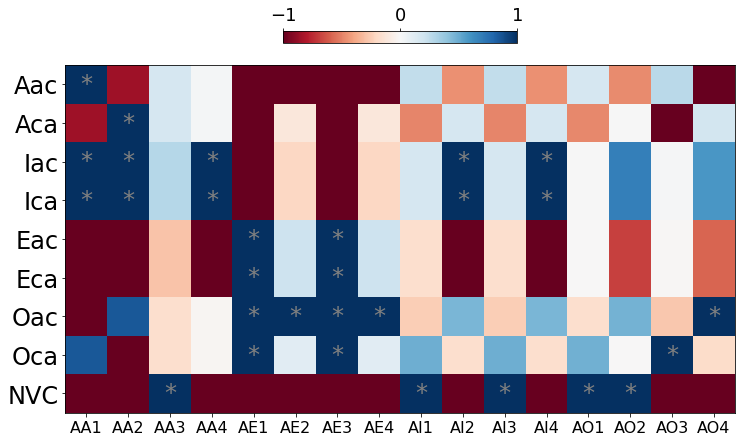

In [53]:
inference_matrix2(by_type_onlydata, types, correct_responses)